In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [ ]:
print(X.shape)

(500, 2)


In [ ]:
# not really needed
np.unique(y)

array([0, 1, 2, 3, 4])

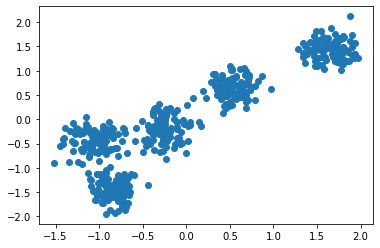

In [ ]:
# Data Visualise 
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-u)/std

X = normalise(X)

plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
k = 5
colors = ["green","red","blue","yellow","orange"]
n_features = 2

def init(k):
    centroids = {}
    for i in range(k):
        center = 2*(2*np.random.random((n_features,)) - 1)
        
        centroids[i] = {
            'center' : center,
            'color' : colors[i],
            'points' : []
        }
    return centroids

centroids = init(k)

In [ ]:
def distance(p,q):
    return np.sqrt(np.sum((p-q)**2))

def assignPtsToCluster(X,centroids):
    m = X.shape[0]
    for i in range(m):
        cdist = []
        cx = X[i]
        
        for kx in range(k):
            d = distance(centroids[kx]['center'],cx)
            cdist.append(d)

        clusterId = np.argmin(cdist)
        centroids[clusterId]['points'].append(cx) 

In [ ]:
def updateClusters(centroids):

    for kx in range(k):
        pts = np.array(centroids[kx]['points'])

        if pts.shape[0] > 0: 
            newCenter = pts.mean(axis=0)
            centroids[kx]['center'] = newCenter 
            centroids[kx]['points'] = [] 

In [ ]:
def plotClusters(centroids):

    for kx in range(k):
        pts = np.array(centroids[kx]['points'])

        if(pts.shape[0]>0):
            plt.scatter(pts[:,0],pts[:,1],color=centroids[kx]['color'])

        uk = centroids[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')

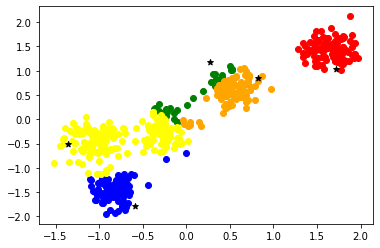

In [ ]:
centroids = init(k)
assignPtsToCluster(X,centroids)
plotClusters(centroids)

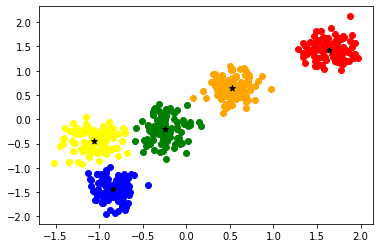

In [ ]:
assignPtsToCluster(X,centroids)
plotClusters(centroids)
updateClusters(centroids)